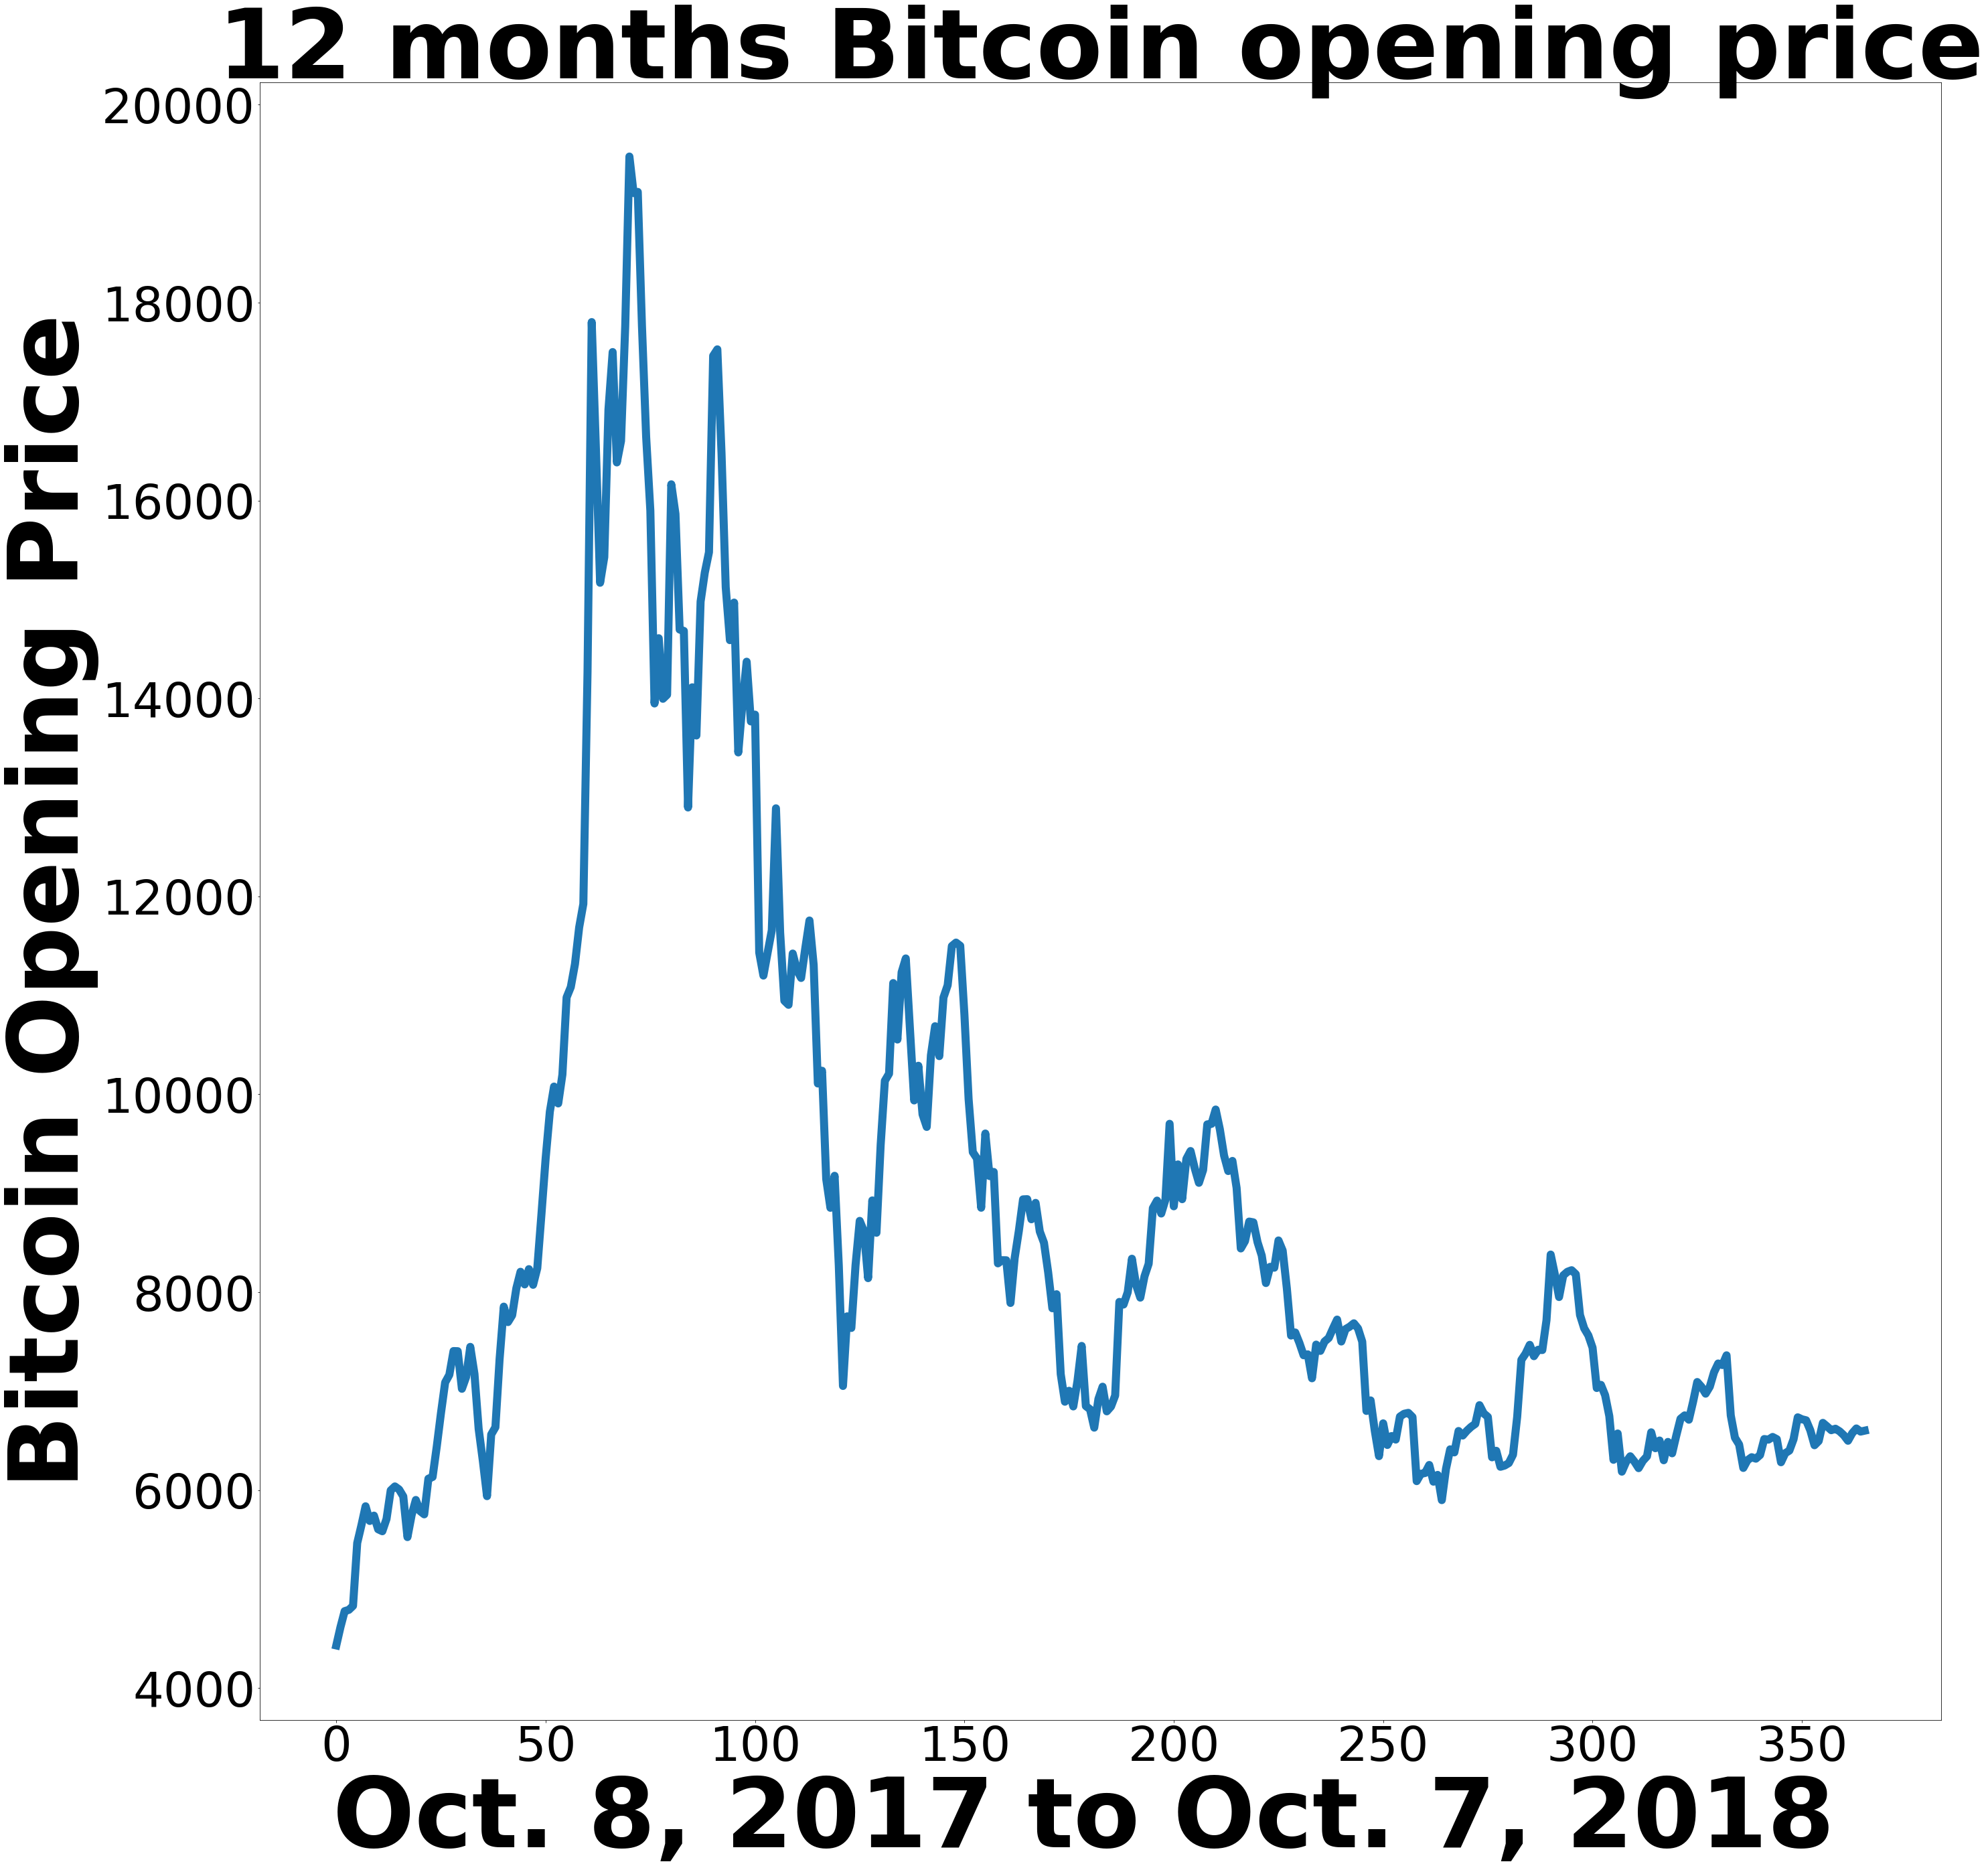

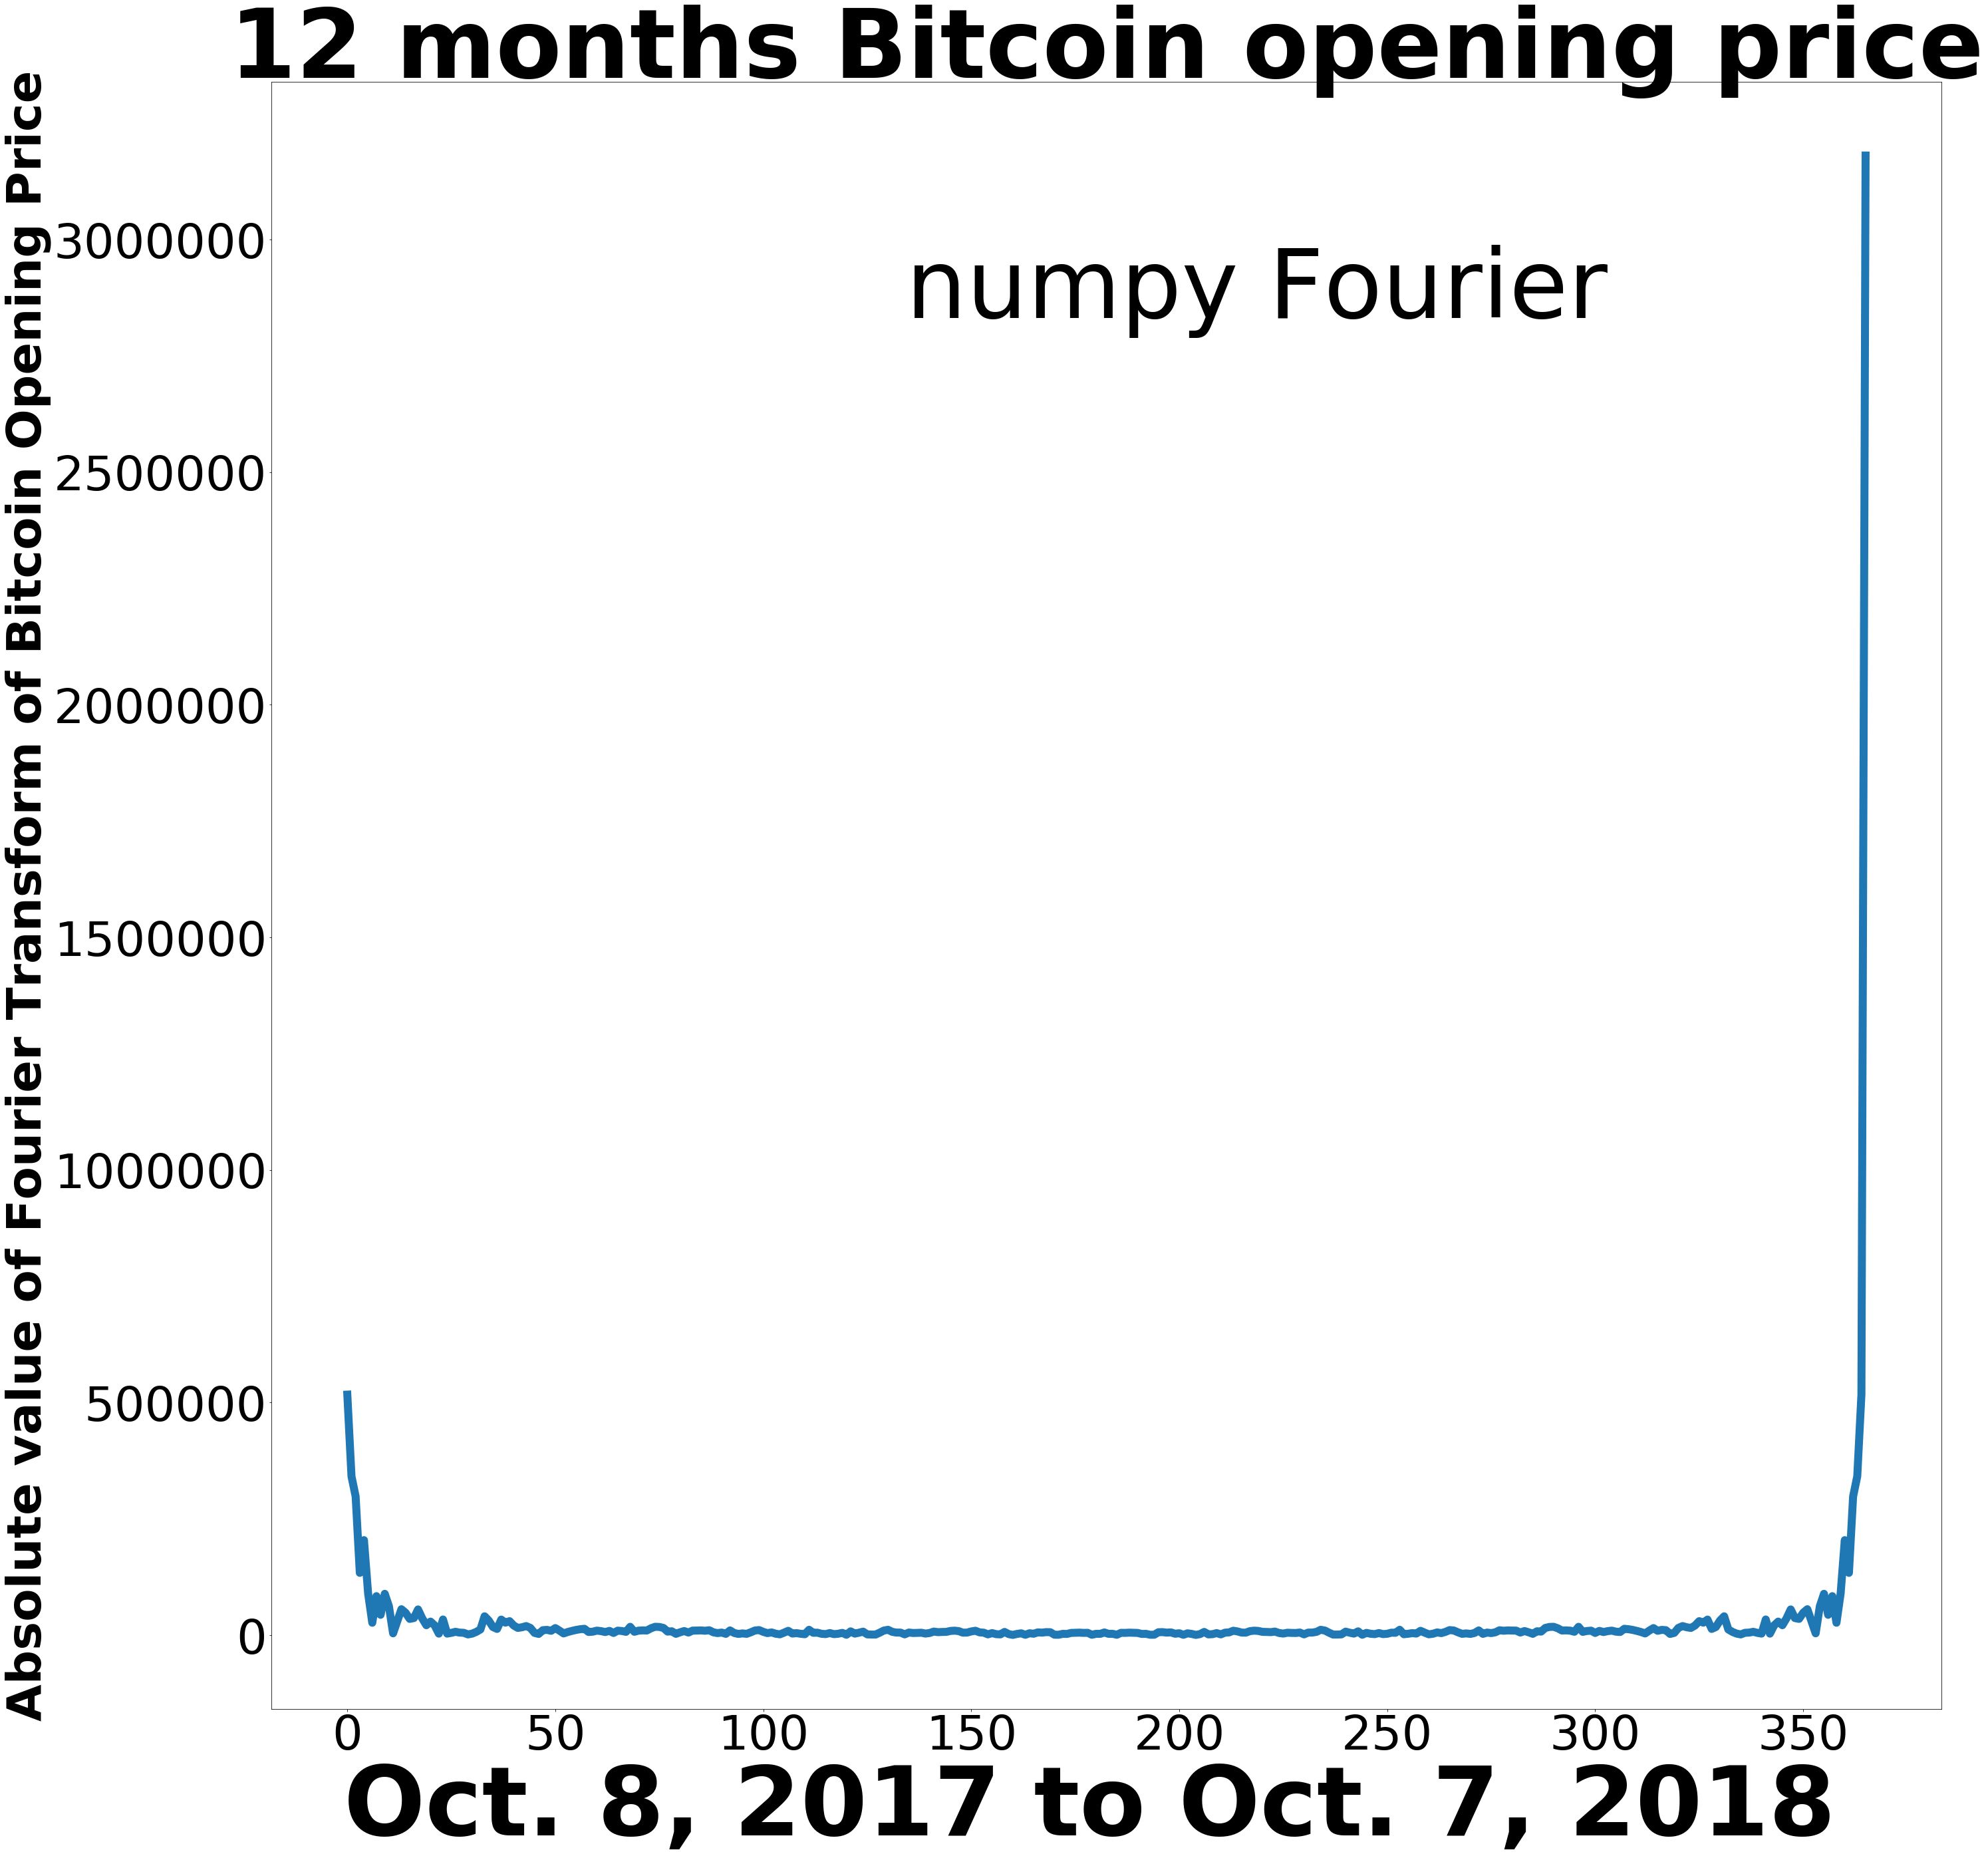

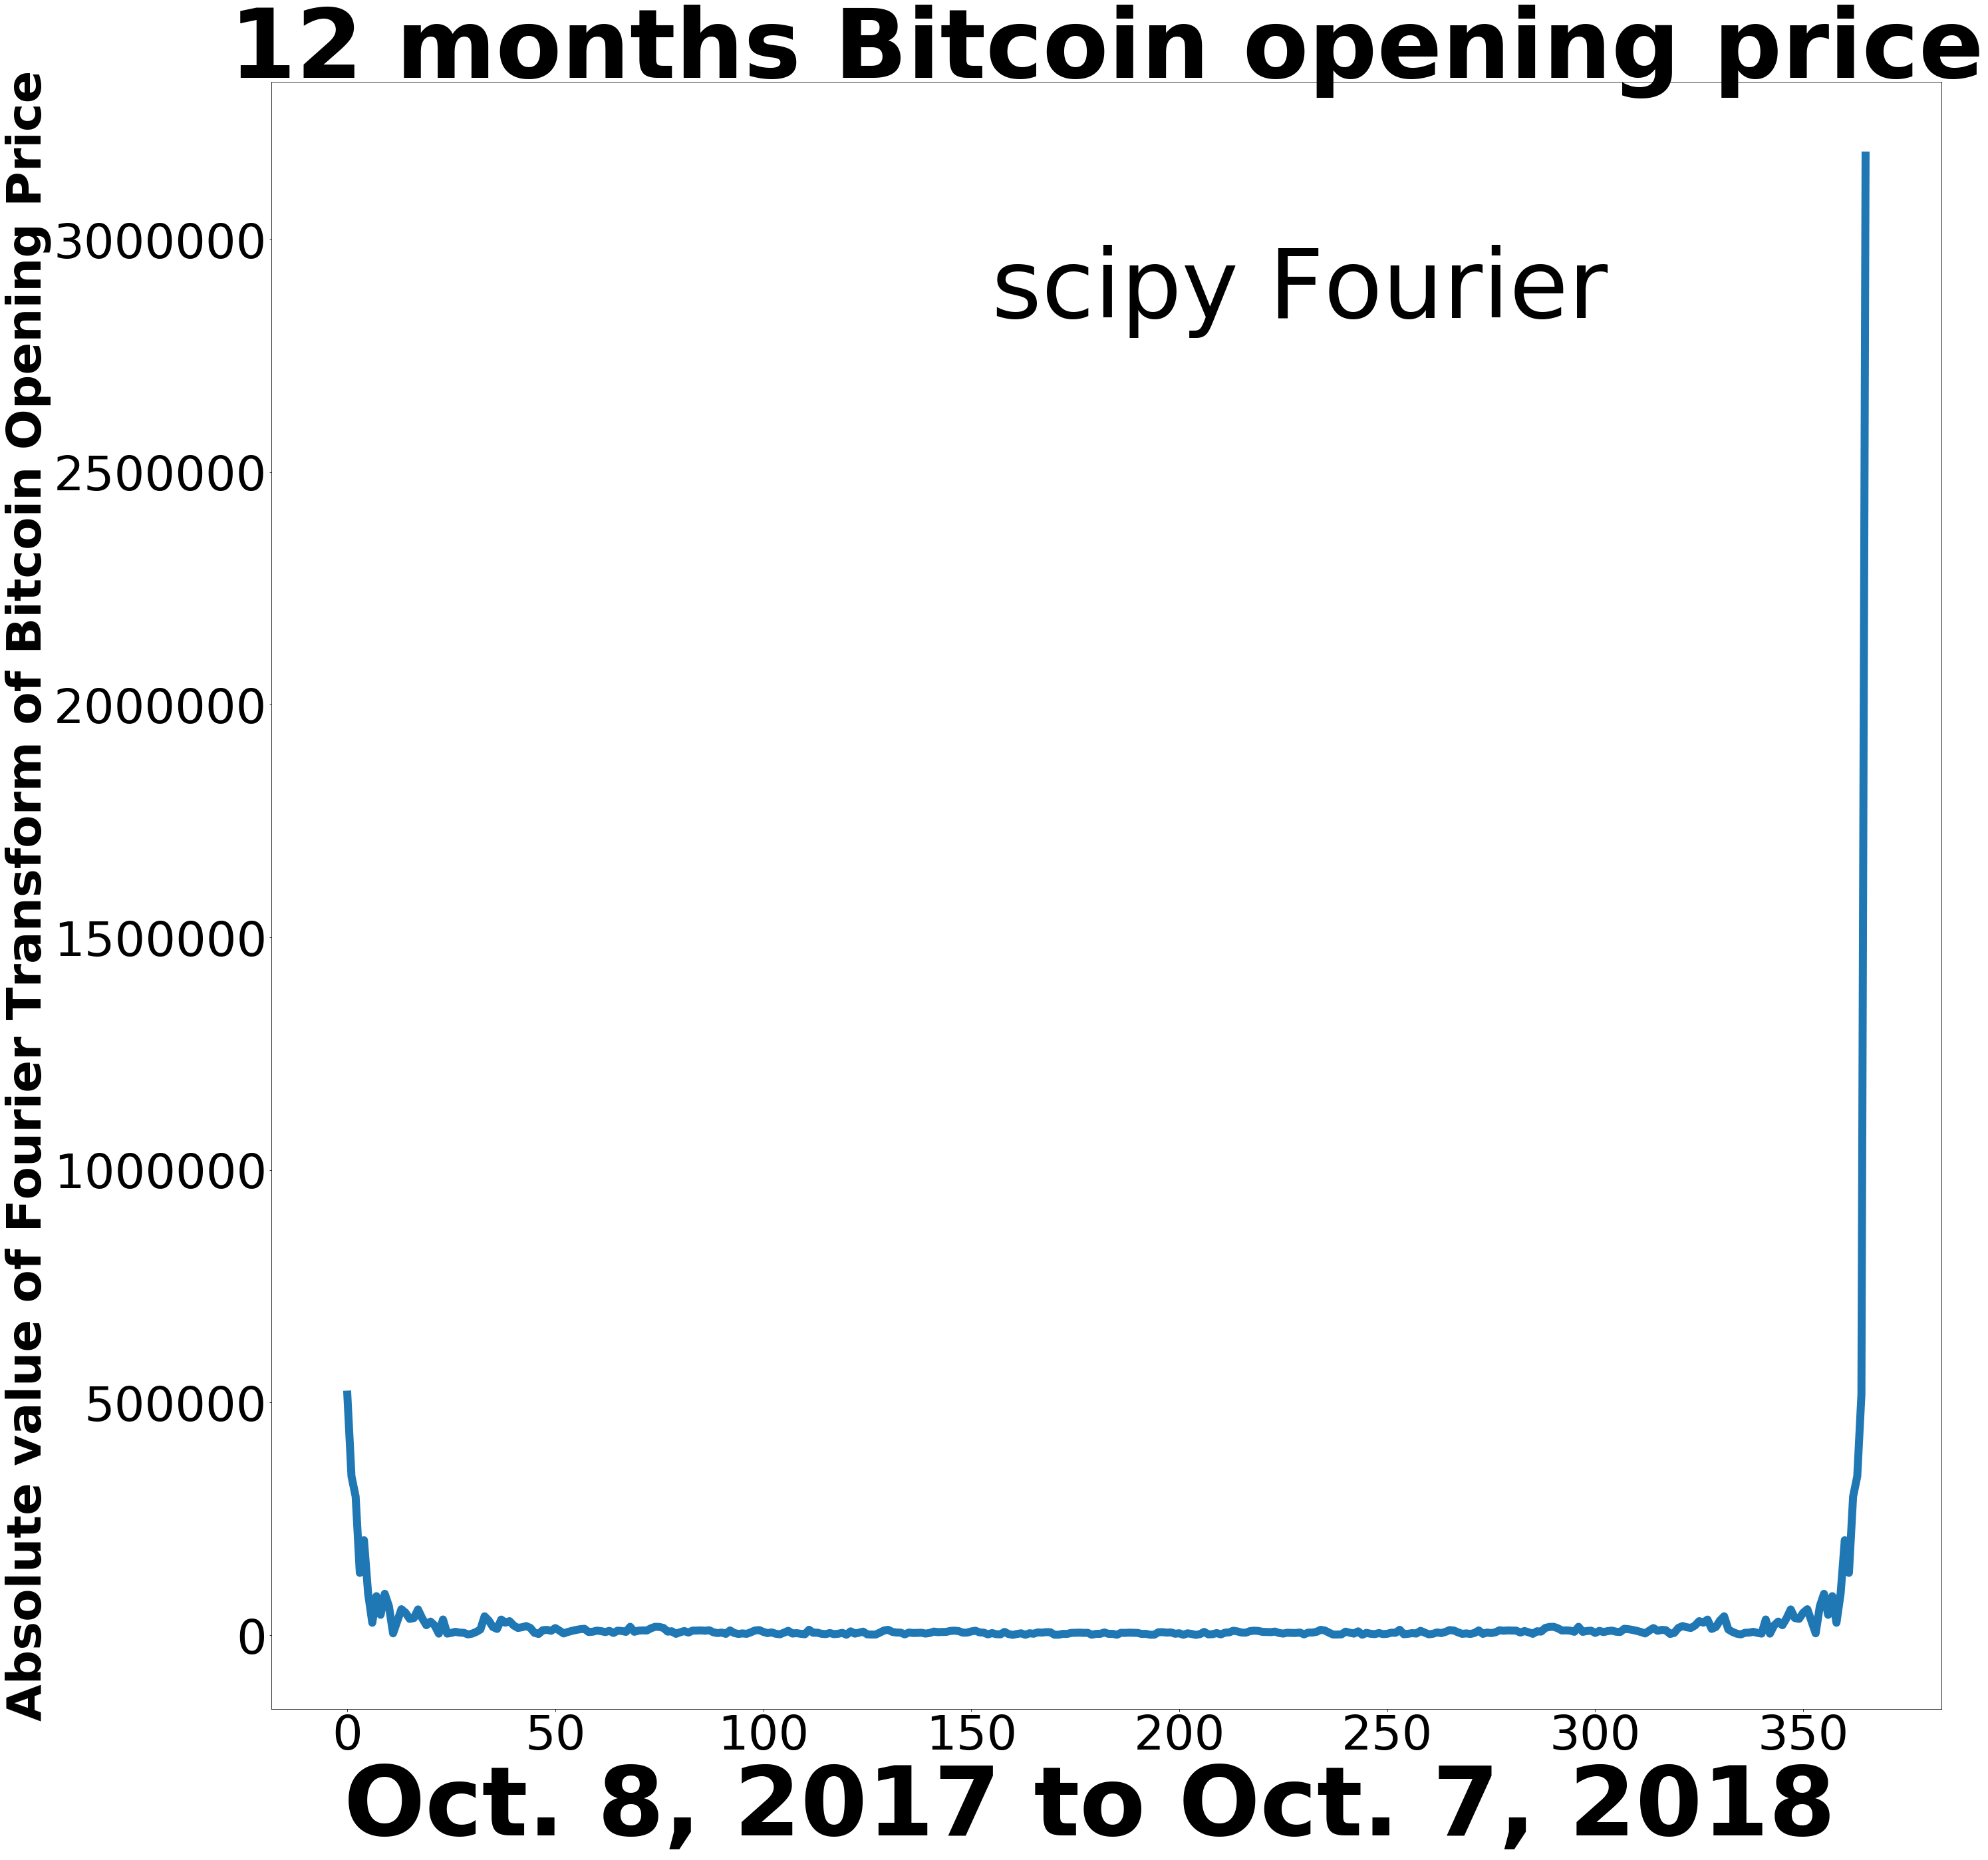

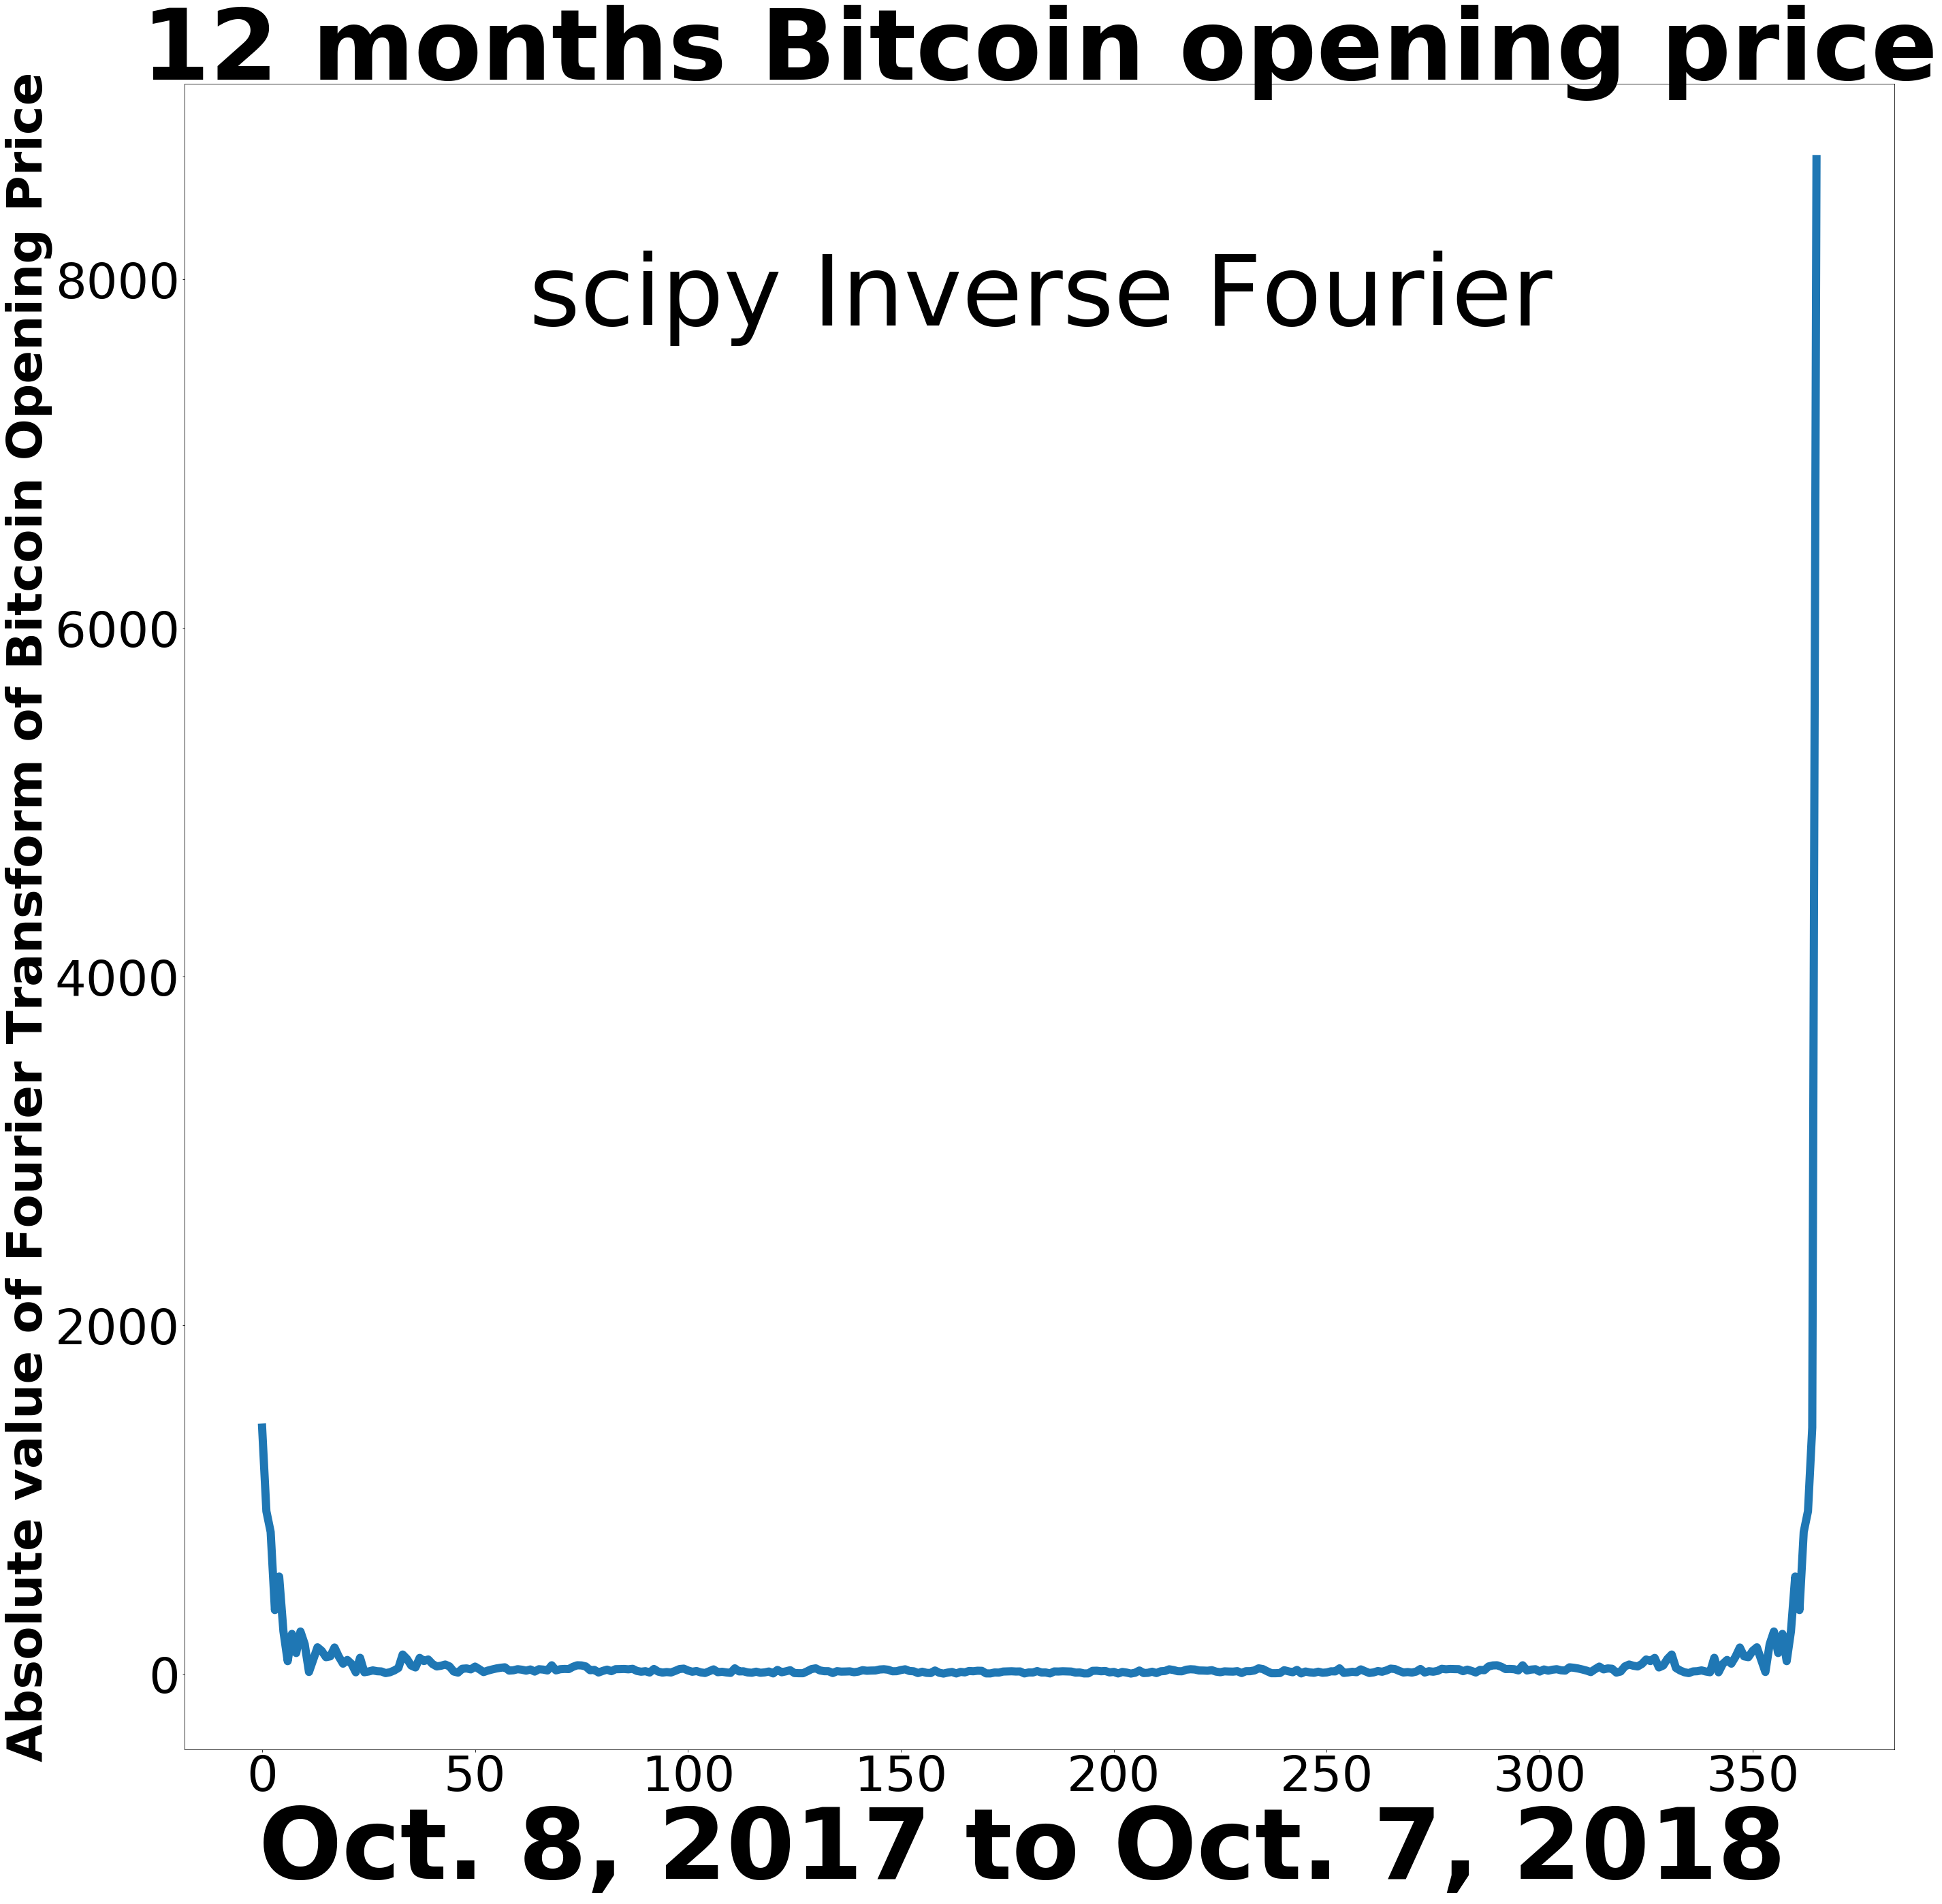

In [18]:
import numpy as np
from numpy import fft
from scipy import fftpack
import matplotlib.pyplot as plt
import matplotlib.image as image 
from random import random
import pandas as pd

def convert_dates_to_days(dates, start_date=None, name='Day'):
    """Converts a series of dates to a series of float values that
    represent days since start_date.
    """

    if start_date:
        ts0 = pd.Timestamp(start_date).timestamp()
    else:
        ts0 = 0

    return ((dates.apply(pd.Timestamp.timestamp) - 
            ts0)/(24*3600)).rename(name)

table_with_dates_converted_to_time_objects, = pd.read_html("https://coinmarketcap.com/currencies/bitcoin/historical-data/?start=20171008&end=20181008", header=0, parse_dates=["Date"])
x_list = convert_dates_to_days(table_with_dates_converted_to_time_objects['Date'], start_date='2017-10-08')
y_list = table_with_dates_converted_to_time_objects['Open*']

image.rcParams["figure.figsize"] = [45, 45] 
plt.title('12 months Bitcoin opening price', size=144, weight=1000)
plt.xlabel('Oct. 8, 2017 to Oct. 7, 2018 ', size=144, weight=1000)
plt.xticks(size=72, weight=500)
plt.ylabel('Bitcoin Opening Price', size=144, weight=1000)
plt.yticks(size=72, weight=500)
plt.plot(x_list, y_list, label='available points', linewidth=12)
plt.show()

y_list_fourier = np.fft.fft(y_list)
plt.title('12 months Bitcoin opening price', size=144, weight=1000)
plt.xlabel('Oct. 8, 2017 to Oct. 7, 2018 ', size=144, weight=1000)
plt.xticks(size=72, weight=500)
plt.ylabel('Absolute value of Fourier Transform of Bitcoin Opening Price', size=72, weight=1000)
plt.yticks(size=72, weight=500)
plt.plot(x_list, np.abs(y_list_fourier), label='Fourier transform', linewidth=12)
plt.annotate('numpy Fourier', (61, 25),
            xytext=(0.8, 0.9), textcoords='axes fraction',
            fontsize=16,
            horizontalalignment='right', verticalalignment='top', size=144)
plt.show()


y_list_fourier = fftpack.fft(y_list)
plt.title('12 months Bitcoin opening price', size=144, weight=1000)
plt.xlabel('Oct. 8, 2017 to Oct. 7, 2018 ', size=144, weight=1000)
plt.xticks(size=72, weight=500)
plt.ylabel('Absolute value of Fourier Transform of Bitcoin Opening Price', size=72, weight=1000)
plt.yticks(size=72, weight=500)
plt.plot(x_list, np.abs(y_list_fourier), label='Fourier transform', linewidth=12)
plt.annotate('scipy Fourier', (61, 25),
            xytext=(0.8, 0.9), textcoords='axes fraction',
            fontsize=16,
            horizontalalignment='right', verticalalignment='top', size=144)
plt.show()

y_list_inverse_fourier = fftpack.ifft(y_list)
plt.title('12 months Bitcoin opening price', size=144, weight=1000)
plt.xlabel('Oct. 8, 2017 to Oct. 7, 2018 ', size=144, weight=1000)
plt.xticks(size=72, weight=500)
plt.ylabel('Absolute value of Fourier Transform of Bitcoin Opening Price', size=72, weight=1000)
plt.yticks(size=72, weight=500)
plt.plot(x_list, np.abs(y_list_inverse_fourier), label='Inverse Fourier transform', linewidth=12)
plt.annotate('scipy Inverse Fourier', (61, 25),
            xytext=(0.8, 0.9), textcoords='axes fraction',
            fontsize=16,
            horizontalalignment='right', verticalalignment='top', size=144)
plt.show()

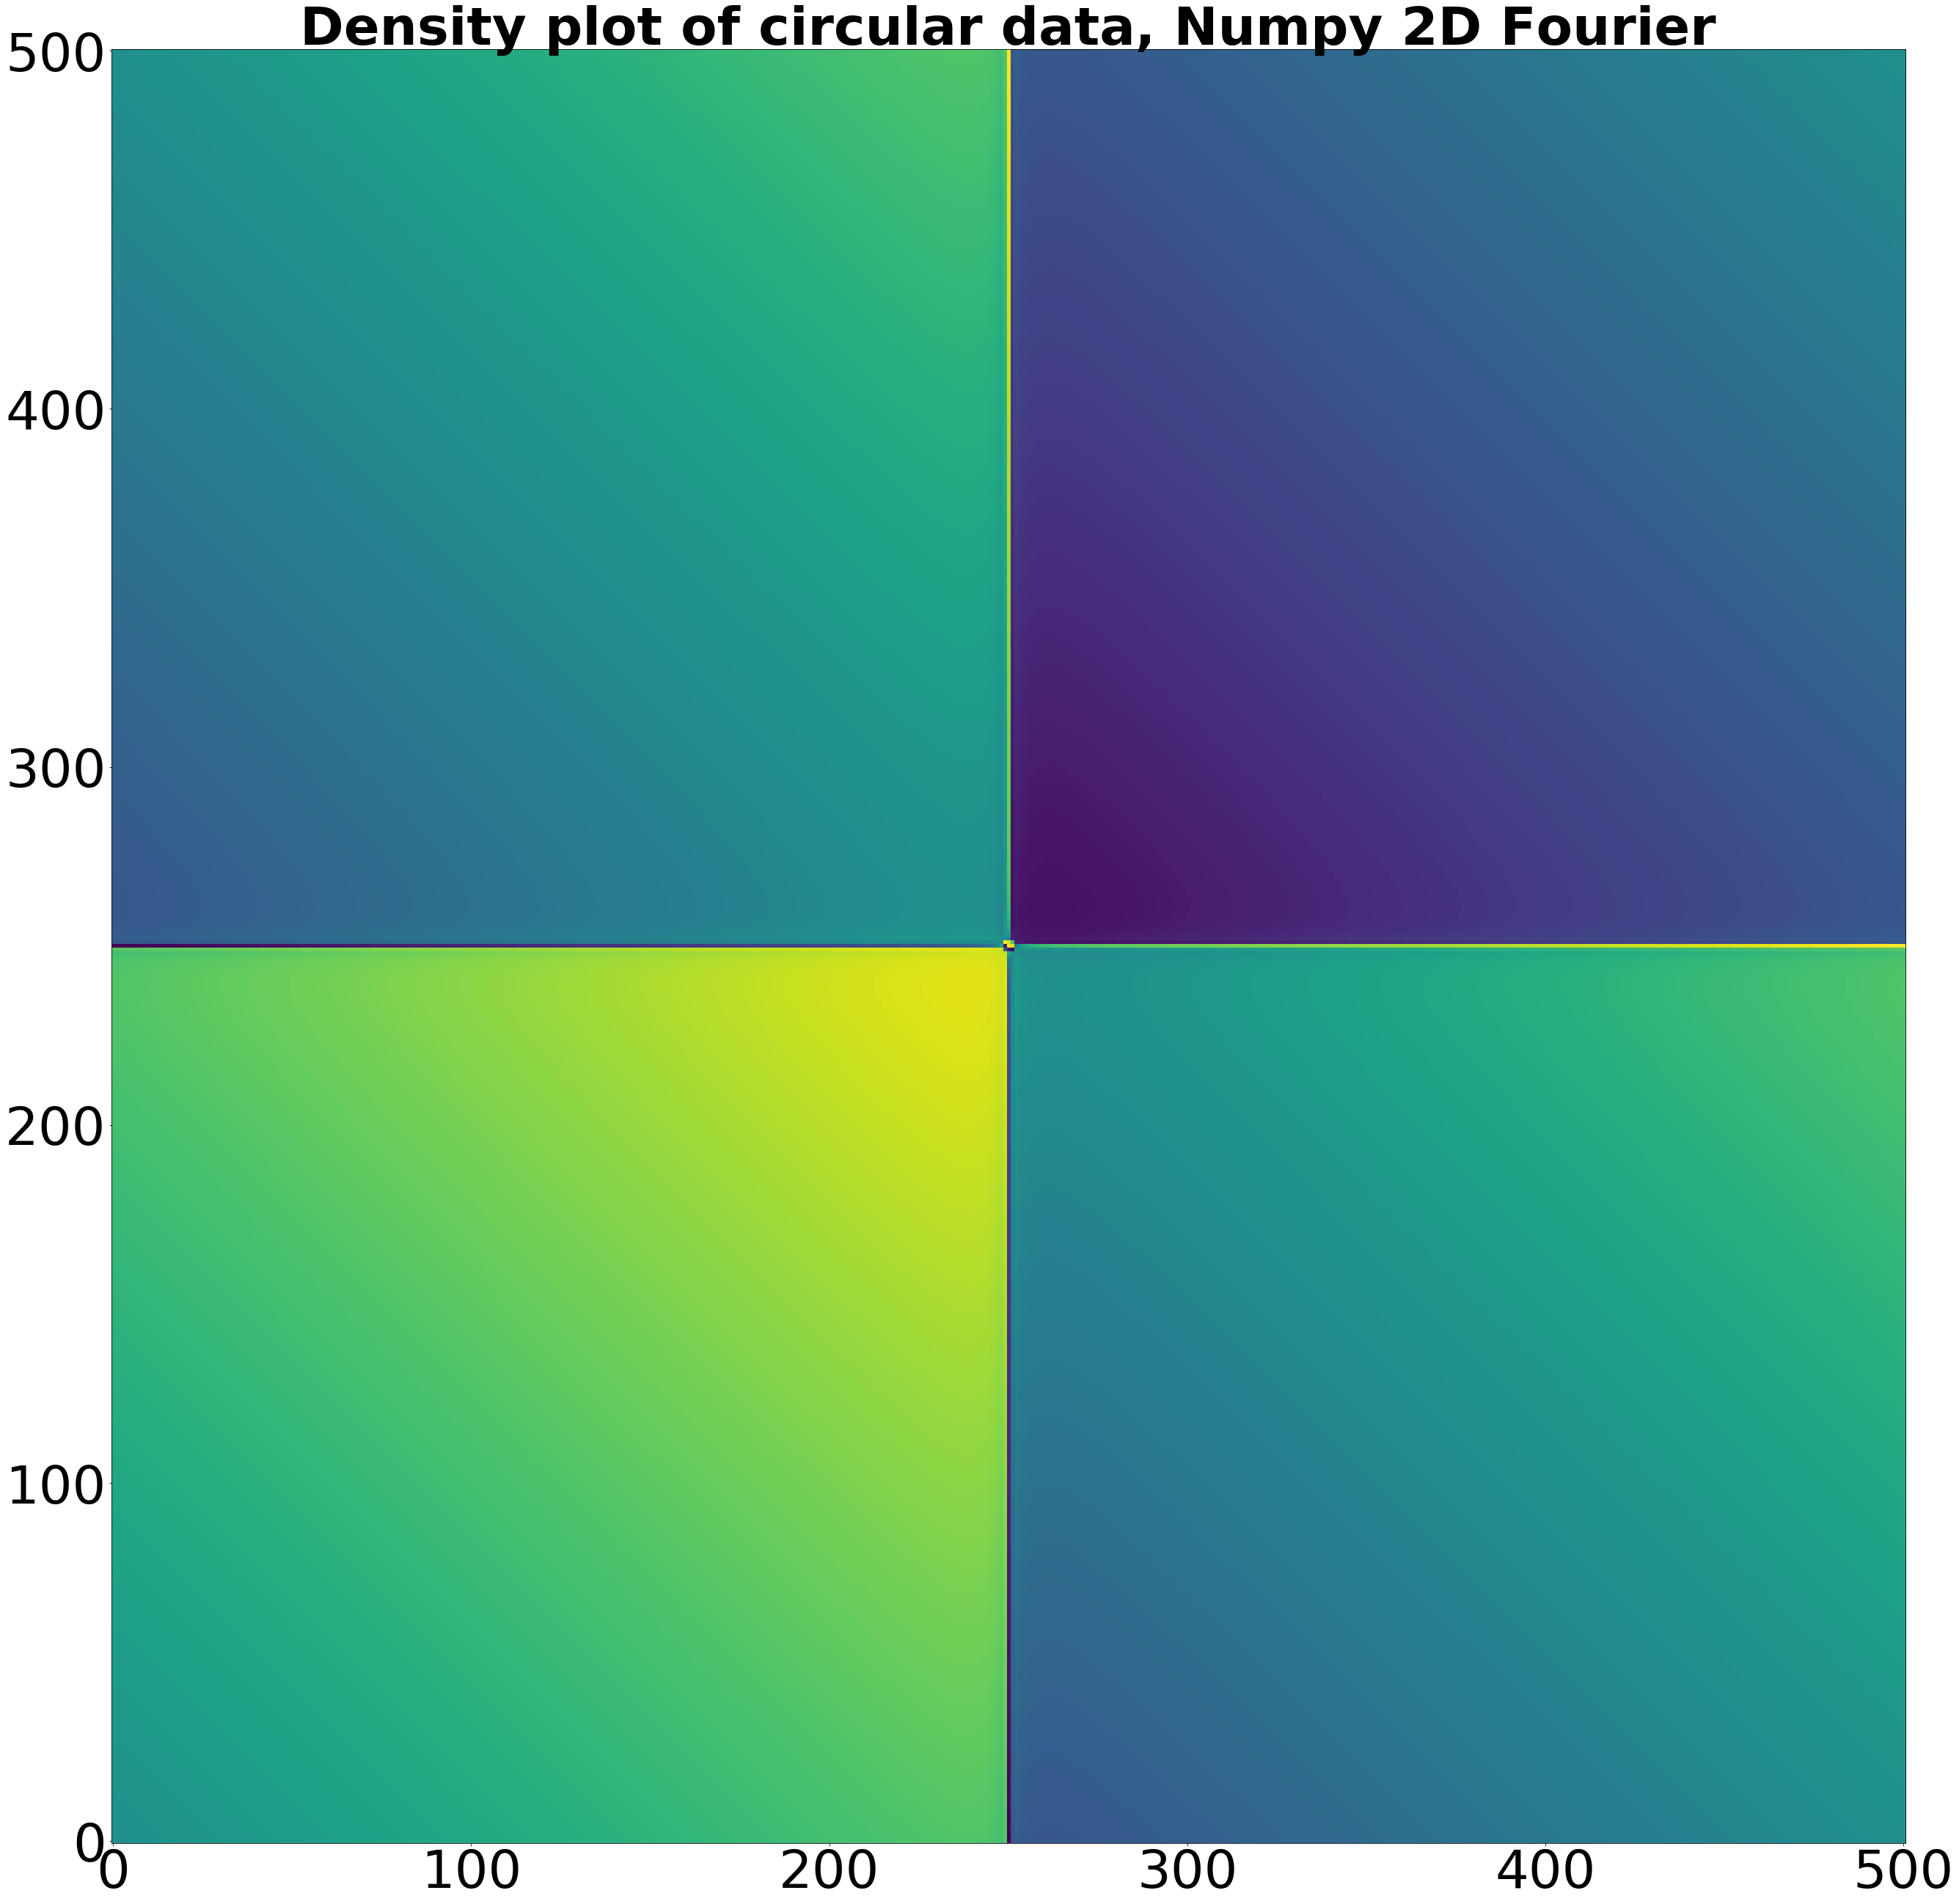

In [36]:
import urllib.request
import numpy as np
from numpy import fft
from scipy import fftpack
import matplotlib.pyplot as plt
import matplotlib.image as image 

req = urllib.request.Request('http://www-personal.umich.edu/~mejn/cp/data/circular.txt')
response = urllib.request.urlopen(req)
the_page = response.read().decode()

c_data = np.fromstring(the_page, dtype='float', sep=' ')
m_data = np.reshape(c_data, (501, 501))

m_data_2D_fourier = np.fft.fft2(m_data)
sshift = np.fft.fftshift(m_data_2D_fourier)
magnitude = 20*np.log(np.abs(sshift))
phase = np.angle(sshift)

image.rcParams["figure.figsize"] = [45, 45] 
plt.title('Density plot of circular data, Numpy 2D Fourier', size=72, weight=1000)
plt.xticks(size=72, weight=500)
plt.yticks(size=72, weight=500)
plt.imshow(phase, origin="lower")
plt.show()

In [74]:
import numpy as np

np.random.random(2)

x = np.random.random(1024)
%timeit np.fft.fft(x)

8 µs ± 266 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


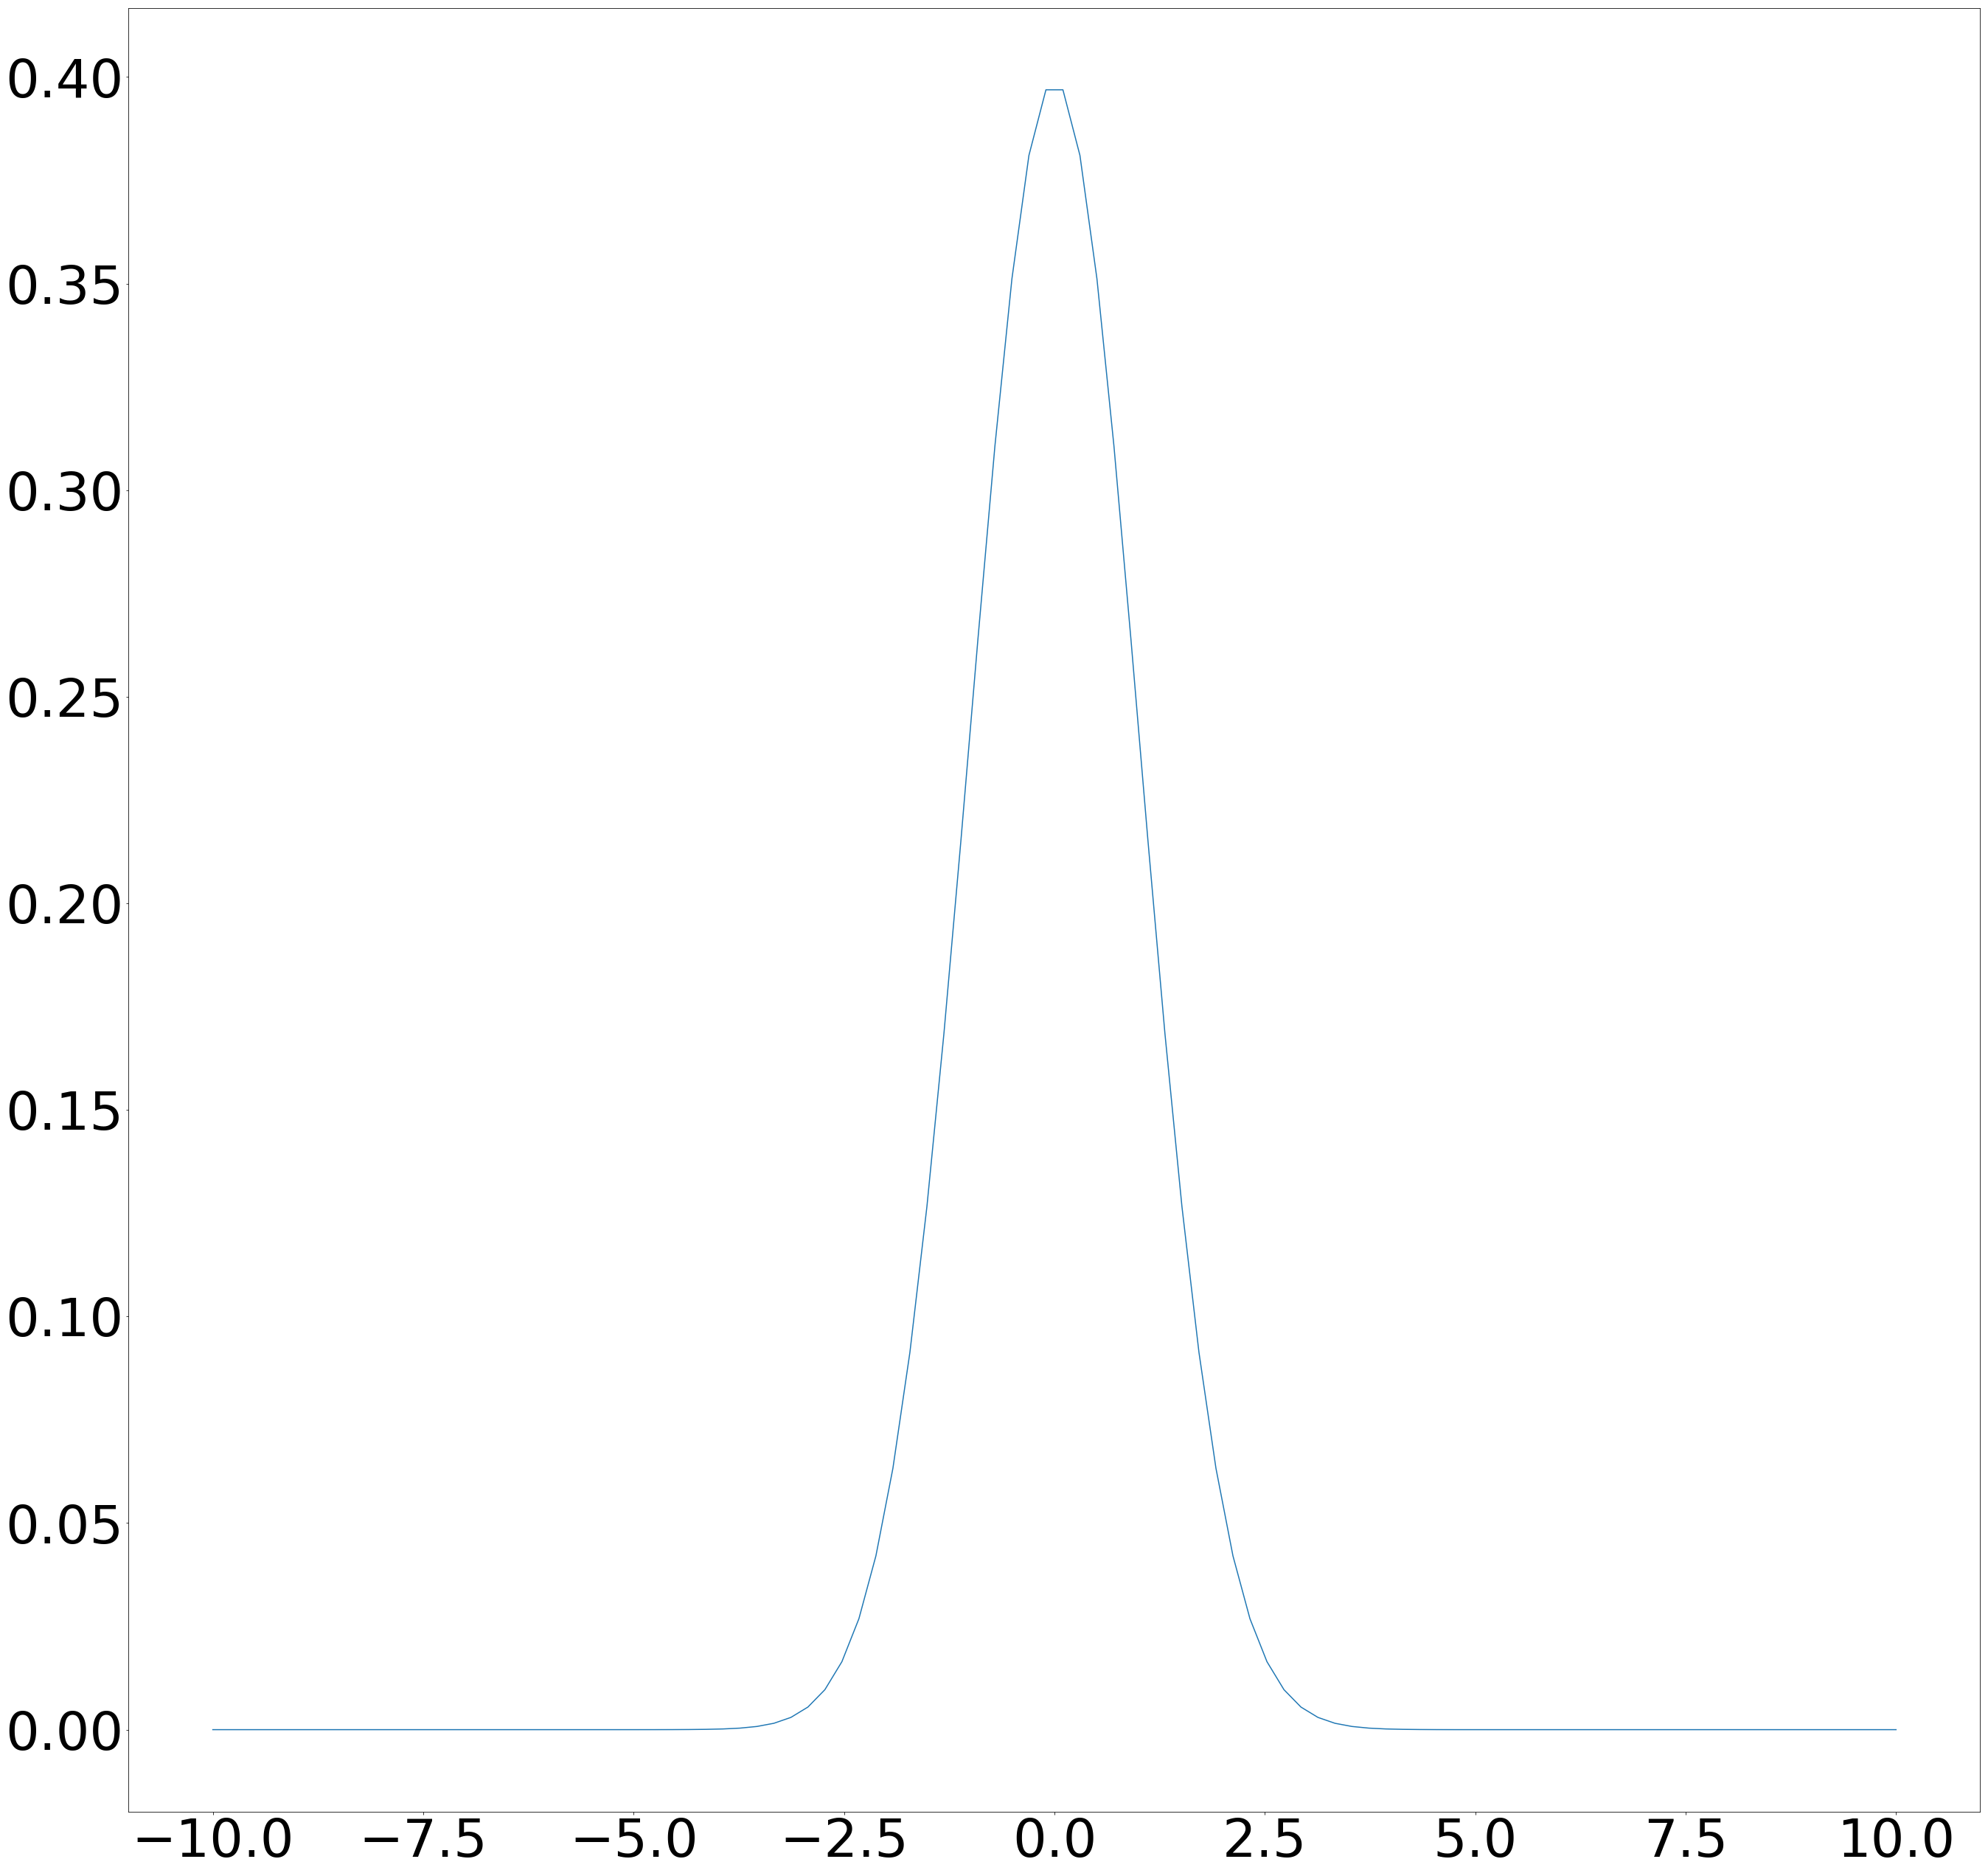

In [55]:

# plot Gaussian distribution 1-d

import matplotlib.pyplot as plt
import numpy as np
from math import pi

def gauss(x, sigma):
    p = ( 1 / (np.sqrt(2*pi)*sigma) ) * np.exp(-x**2/2/sigma**2)
    return p

sigma = 1
x = np.linspace(-10,10,100)
plt.xticks(size=72, weight=500)
plt.yticks(size=72, weight=500)
plt.plot(x, gauss(x, sigma))
plt.show()

In [46]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from math import pi
import matplotlib.image as image 


def gauss(x,y, sx, sy):
    p = np.exp(-x**2/2/sx**2 -y**2/2/sy**2)
    return p

sigma = 1
nx = np.linspace(-10,10,100)
ny = np.linspace(-10,10,100)
x,y = np.meshgrid(nx,ny)
z = gauss(x, y, 5, 5)
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(x,y,z, cmap='jet')
#ax.plot_wireframe(x,y,z, cmap='hot')
#plt.show()
#ax.contour(x,y,z, cmap='hot')
plt.show()

In [47]:
import numpy as np
import matplotlib.pyplot as plt

def Trapezoid(f, start, end, parts=500):
    """    Trapezoid sum rule    """

    x = np.linspace(start, end, parts+1)
    dx = (end-start)/parts
    return ( 1/2*f(x[0]) + sum(f(x[1:-1])) + 1/2*f(x[-1]) )*dx

f = lambda x: 1/np.sqrt(2*pi)*np.exp(-x**2/2) 
Trapezoid(f, -10, 10)

0.9999999999999996

In [48]:
from scipy import integrate
import numpy as np

f = lambda x: 1/np.sqrt(2*np.pi)*np.exp(-x**2/2) 

a_tuple = integrate.quad(f, -10, 10)
print(a_tuple[0])

1.0


/Users/user/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """
/Users/user/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sin
  """


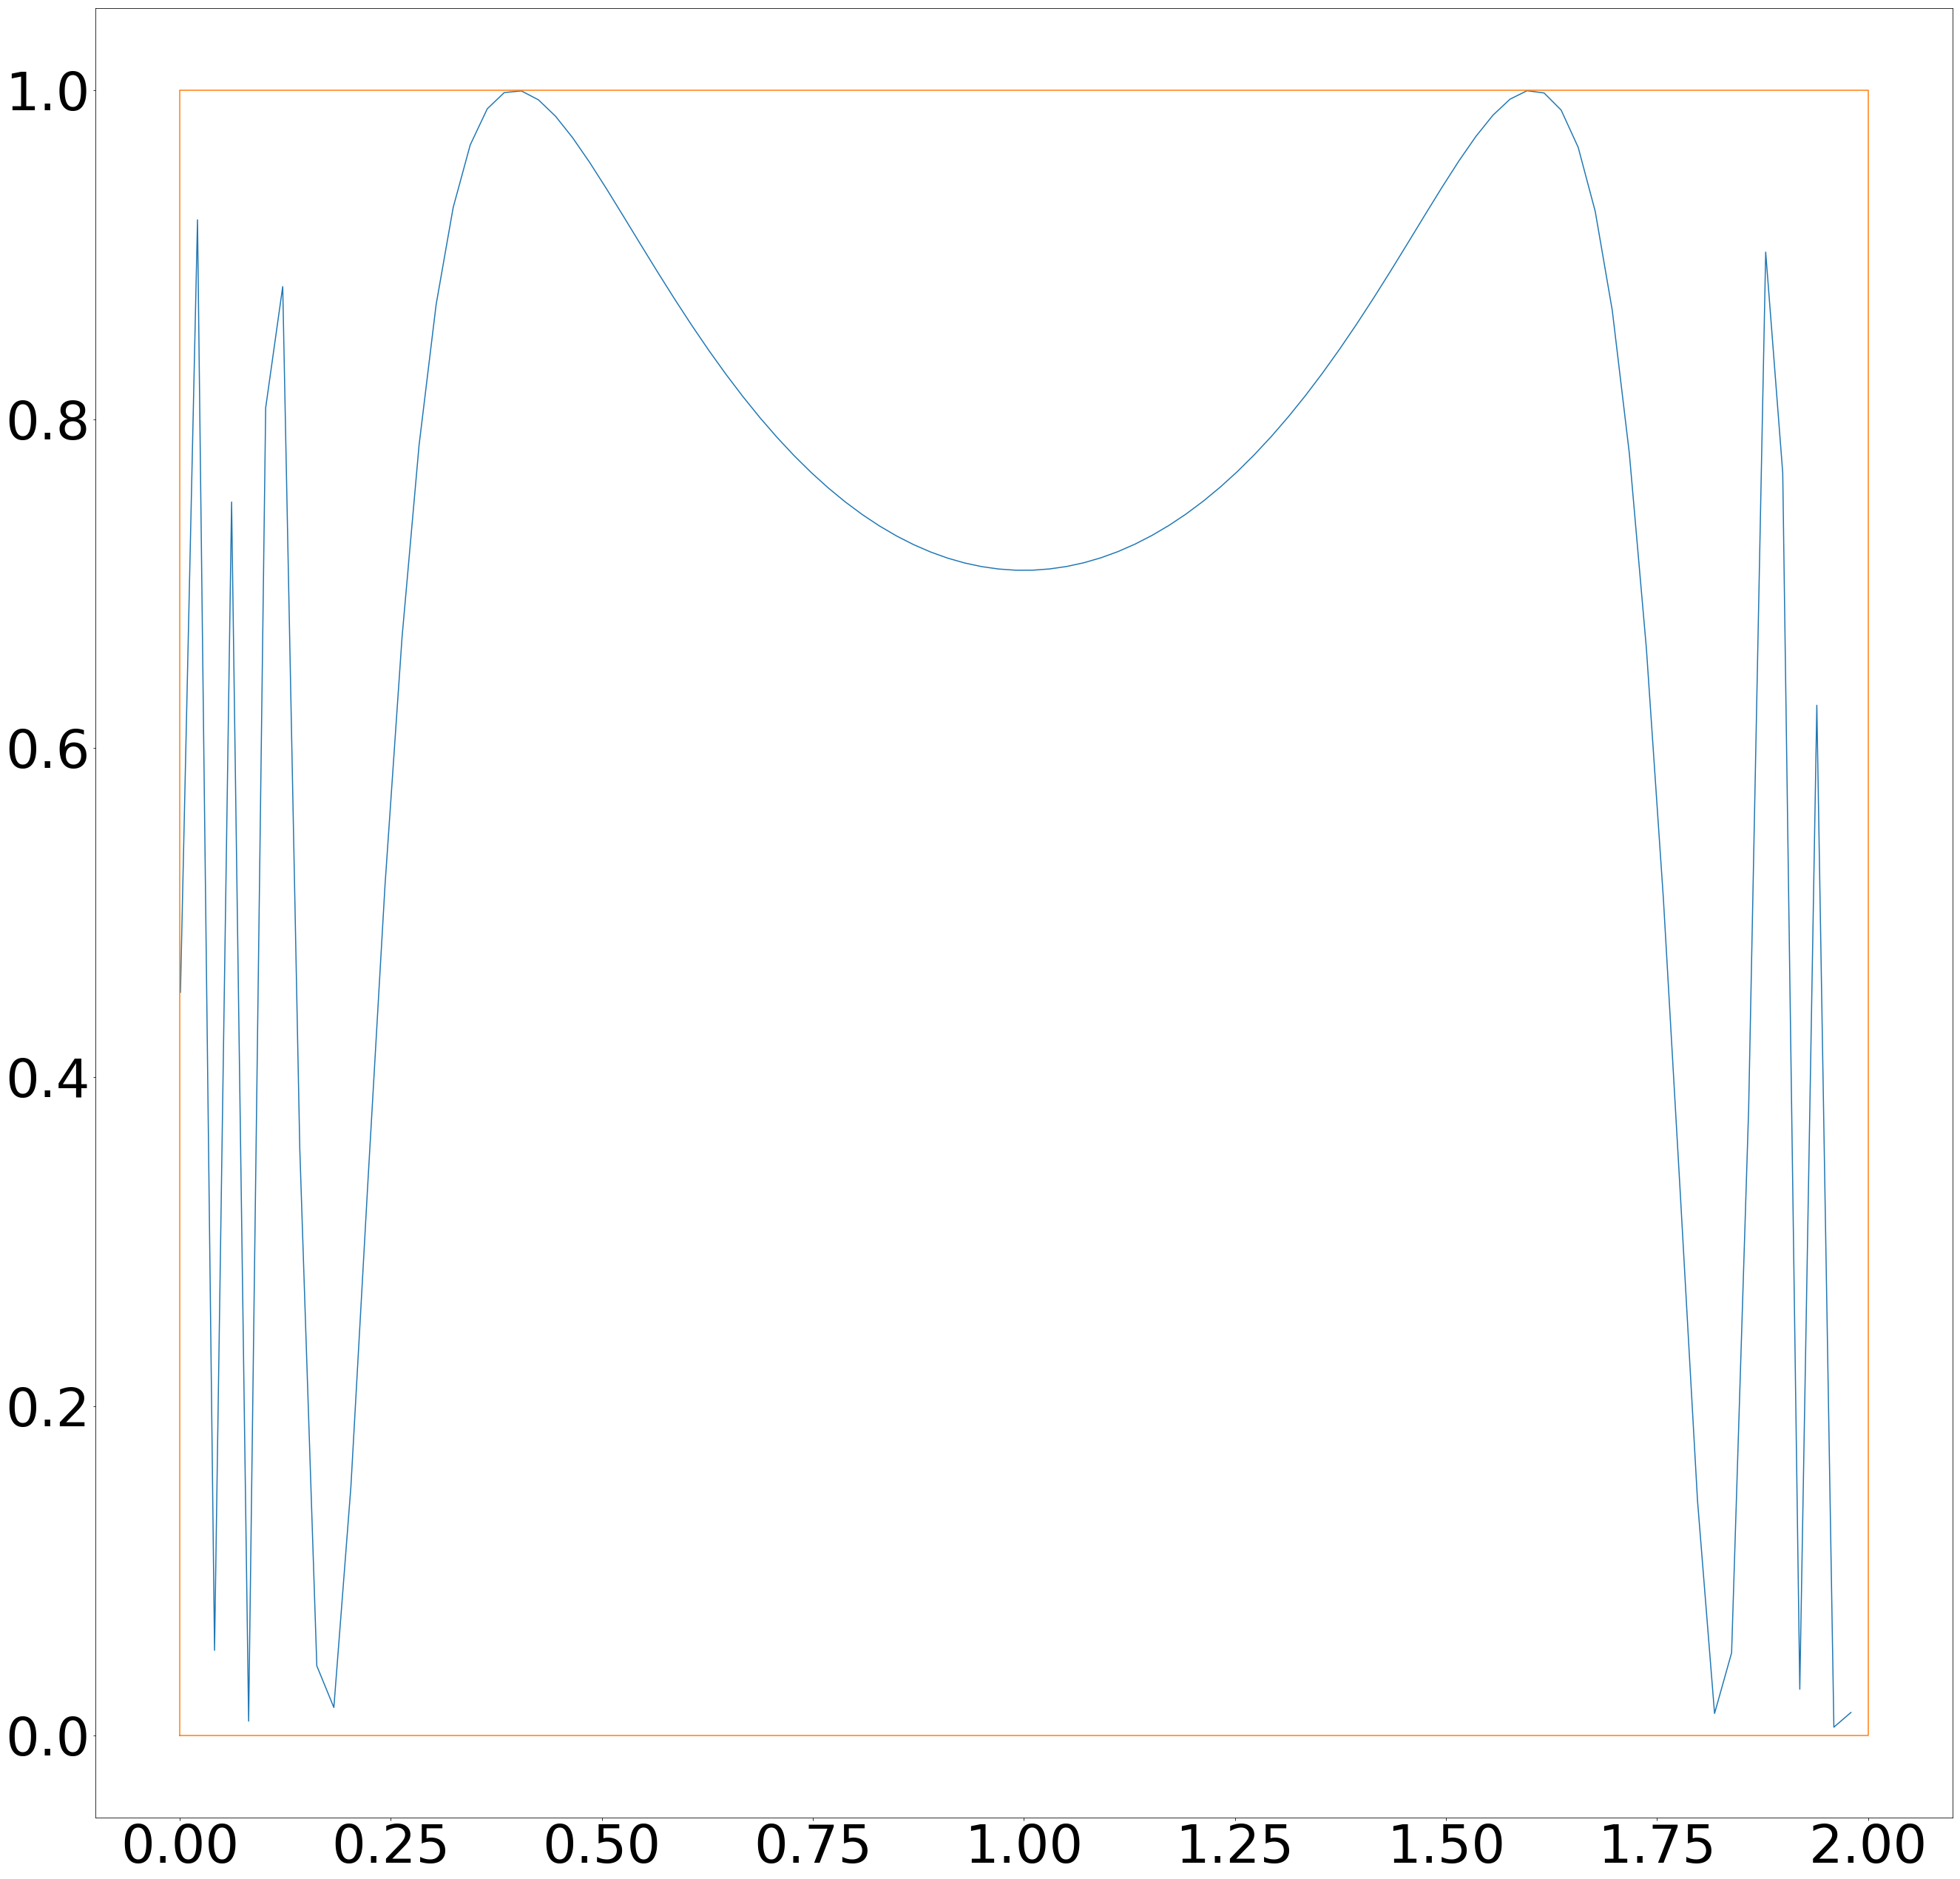

In [50]:
import matplotlib.pyplot as plt
import numpy as np

def f(x):
    return np.sin(1/(x*(2-x)))**2


# plot the f(x)
x = np.linspace(0.001,2,100)
plt.plot(x, f(x))

# plot the boundary
plt.plot([0,0,2,2,0],[0,1,1,0,0])
plt.xticks(size=72, weight=500)
plt.yticks(size=72, weight=500)
plt.show()

In [75]:
import matplotlib.pyplot as plt
from math import sin
from random import random
from scipy import integrate
import numpy as np

def f(x):
    return np.sin(1/(x*(2-x)))**2

f = lambda x: np.sin(1/(x*(2-x)))**2

a_tuple = integrate.quad(f, 0, 2)
print("true value of integral is: ", a_tuple[0])

def Monte_Carlo(N):
    count = 0
    for i in range(N):
        x = 2*random()
        y = random()
        if y<f(x):
            count += 1
    I = 2*count/N
    return I

print("Monte Carlo approximation of integral is: ", Monte_Carlo(100000))

/Users/user/miniconda3/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)


true value of integral is:  1.4516877509810684
Monte Carlo approximation of integral is:  1.45318


value of integral of f1 is:  1.570796326794898
value of integral of f2 is:  0.8584073464102066
standard deviation is: 0.001356323263827617
Monte Carlo approximation of shaded green area is:  0.97208
standard deviation is: 0.001356323263827617


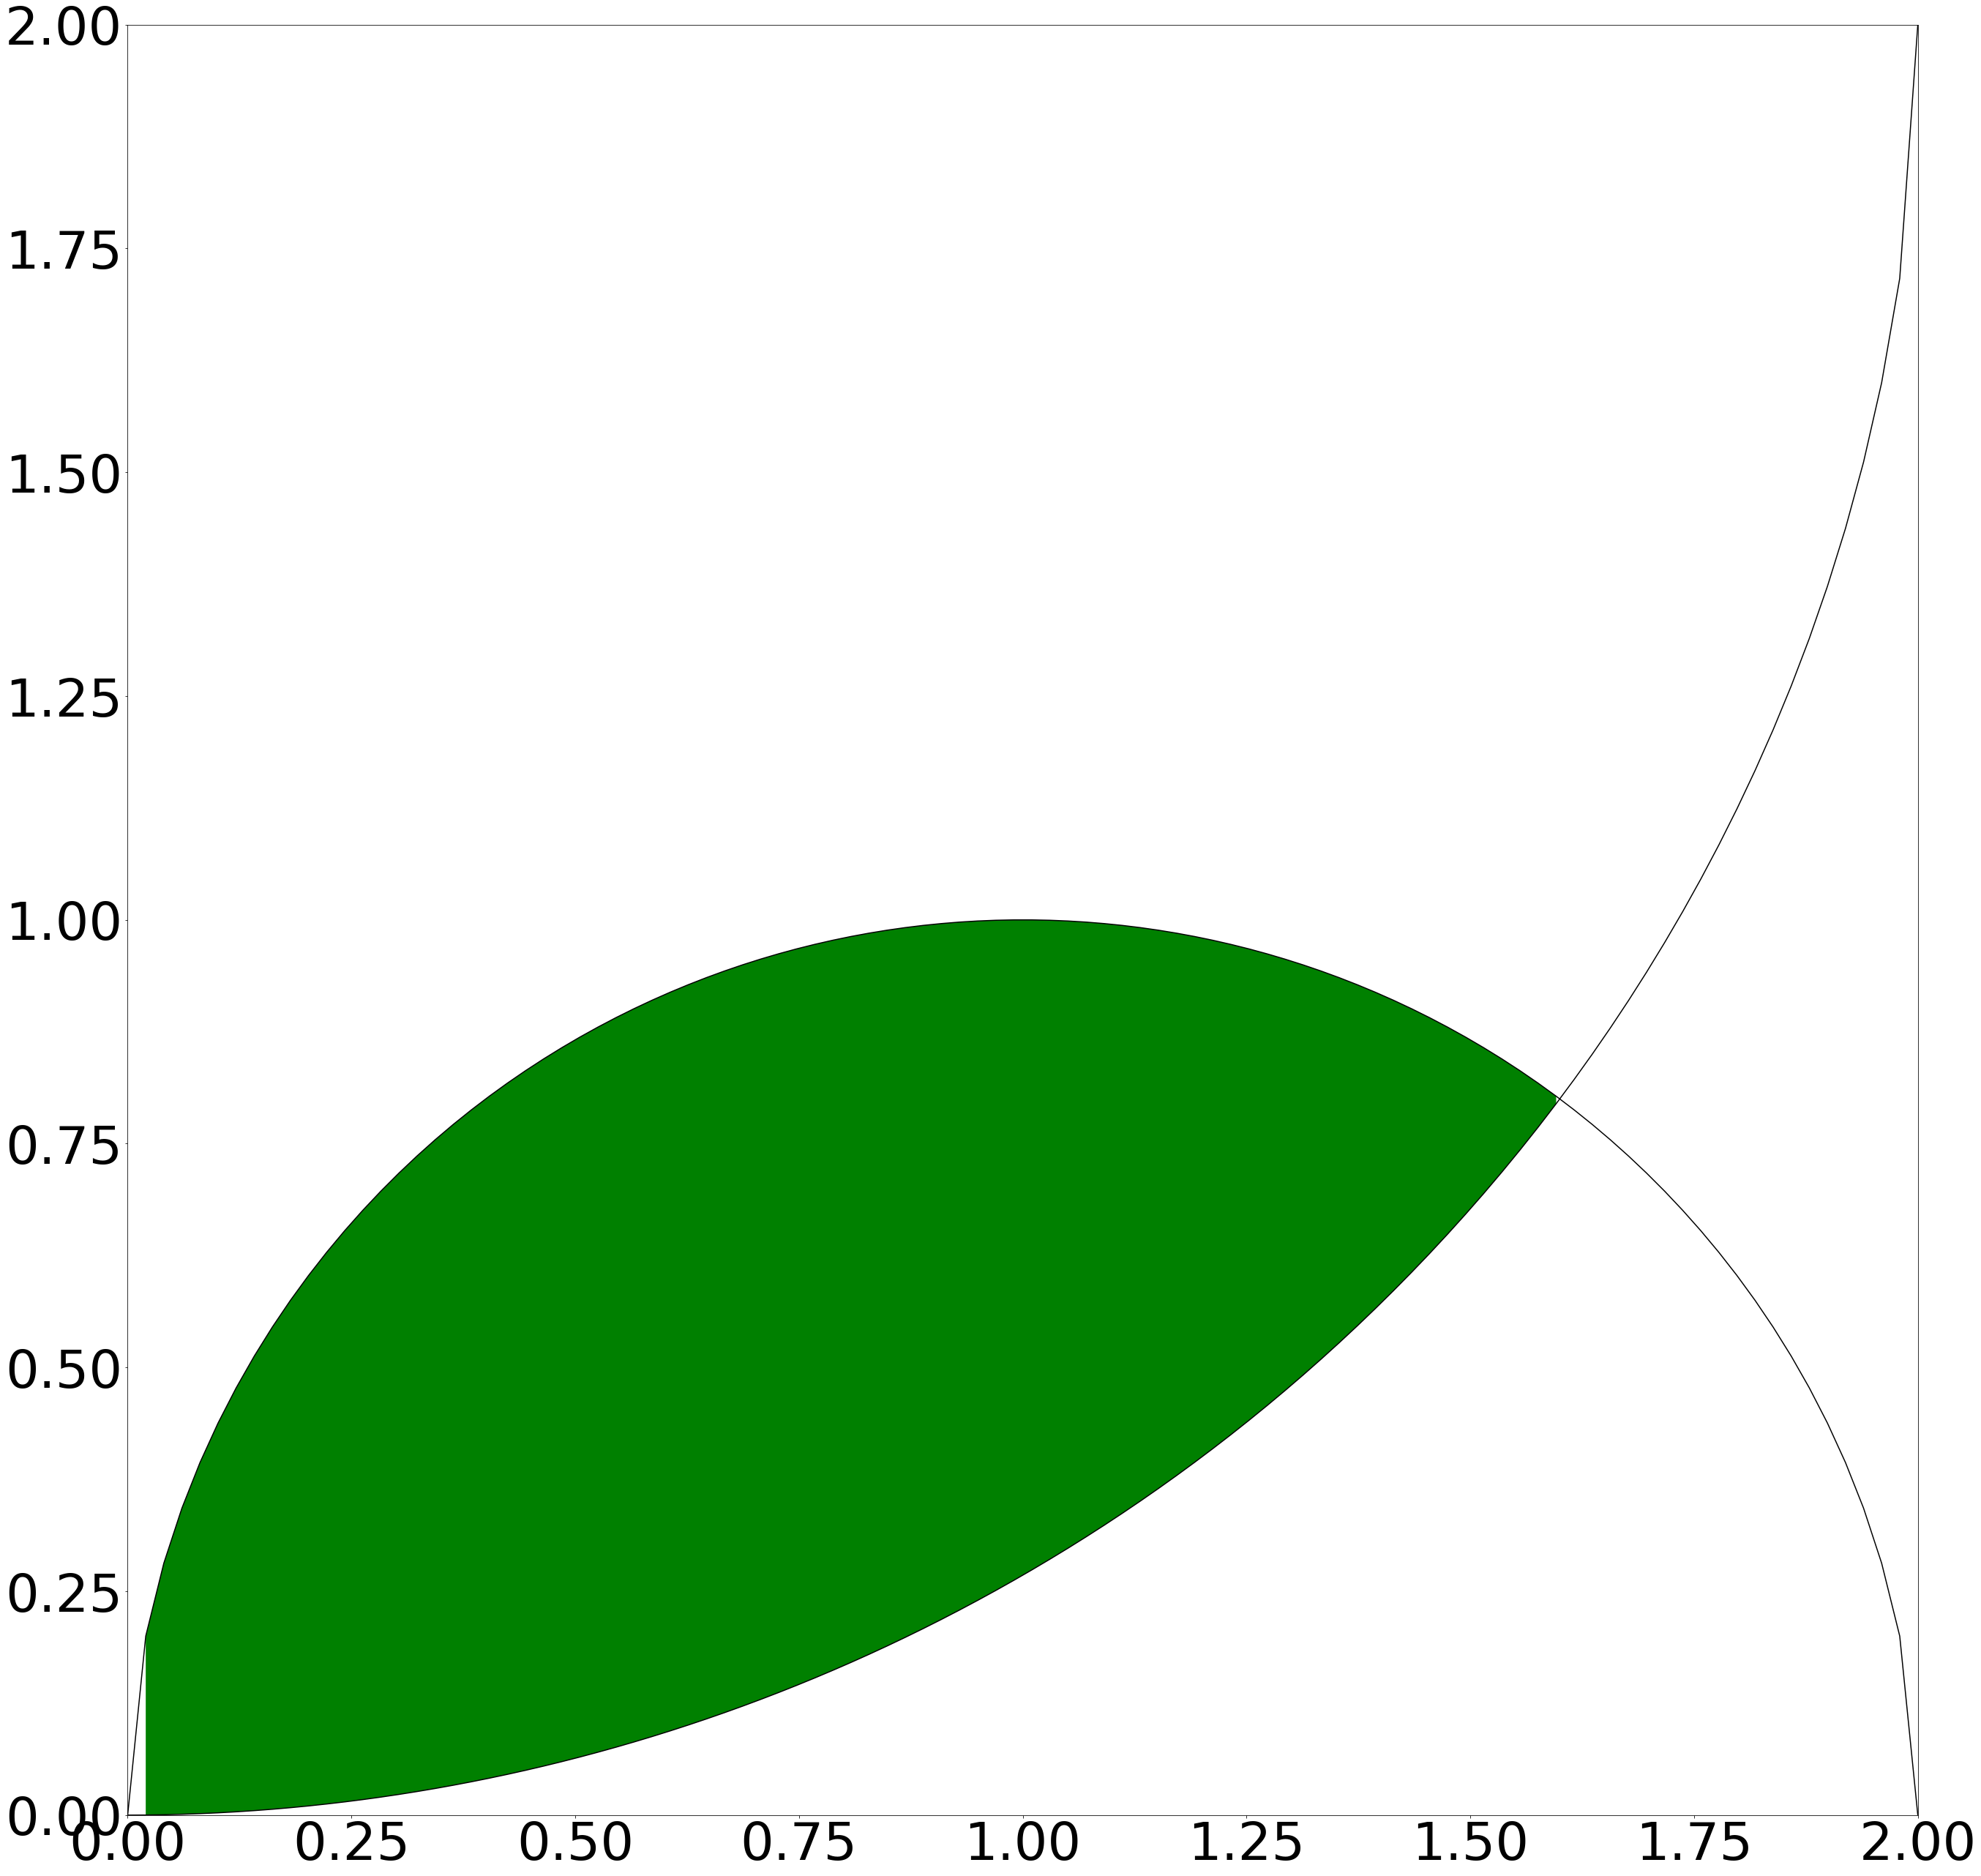

In [134]:
import matplotlib.pyplot as plt
from scipy import integrate
import numpy as np
from numpy import sqrt

fig1 = plt.figure()
ax1 = fig1.add_subplot(111, aspect='equal')

x1 = np.linspace(0,2,100)
f1 = lambda x: np.sqrt(1-(x-1)**2)
ax1.plot(x1,f1(x1),'k')

a_tuple = integrate.quad(f1, 0, 2)
value_of_f1 = a_tuple[0]
print("value of integral of f1 is: ", a_tuple[0])

f2 = lambda x: 2-np.sqrt(4-x**2)

b_tuple = integrate.quad(f2, 0, 2)
value_of_f2 = b_tuple[0]
print("value of integral of f2 is: ", b_tuple[0])


def Monte_Carlo_2(N, A):
    count = 0
    for i in range(N):
        x = 2*random()
        y = 2*random()
        if y < f1(x) and y > f2(x):
            count += 1
    Area = A
    I = Area * count / N
    # standard deviation = np.sqrt( p*(1-p) / N) where p = I/A
    p = I / Area
    std_dev = np.sqrt( p*(1-p) / N )
    print("standard deviation is:", std_dev)
    return I, std_dev

integral_value, std_dev = Monte_Carlo_2(100000, A=4)
print("Monte Carlo approximation of shaded green area is: ", integral_value)
print("standard deviation is:", std_dev)

ax1.plot(x1,f2(x1),'k')

ax1.set_xlim(0,2)
ax1.set_ylim(0,2)
ax1.fill_between(x1, f1(x1), f2(x1), where=f1(x1)>f2(x1), facecolor='green')
plt.xticks(size=72, weight=500)
plt.yticks(size=72, weight=500)
plt.show()
